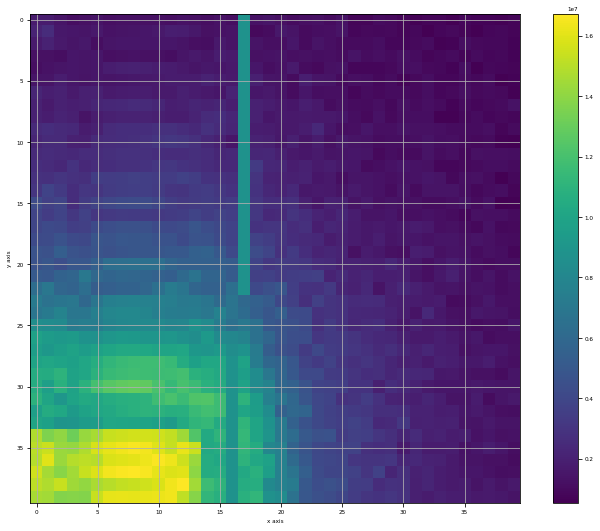

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel
import math

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg


data = pd.read_pickle('asher_20230603_hyperspec_EL2_98.pkl')

im = data['im']
wavel = data['wavelength']
map = np.sum(im, axis = 2)
# pixel numbers x and y
px = len(im)
py = len(im[0])
intensity = np.zeros((px,py))
#total intensity plot
plt.figure(figsize=(12,9))
plt.grid()
plt.imshow(map, cmap='viridis')
plt.colorbar()
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

# Check Full PL

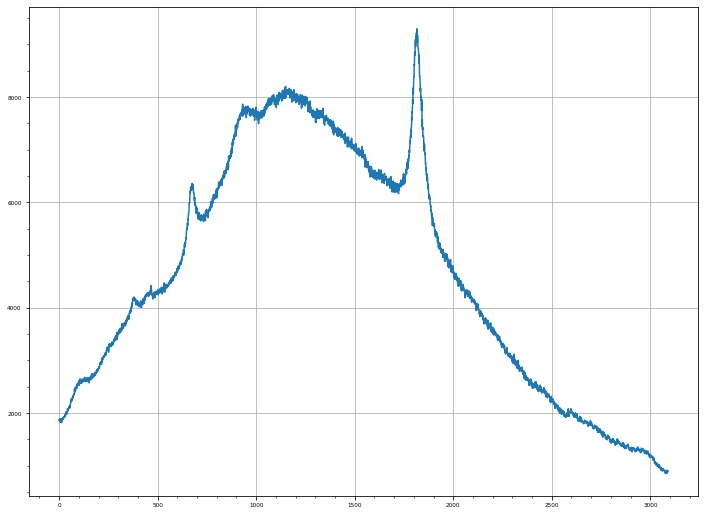

In [43]:
# regionx, regiony = 20,27
# regionx, regiony = 0,0
regionx, regiony = 36,13
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['im'][regionx][regiony])

# Check SiV- PL

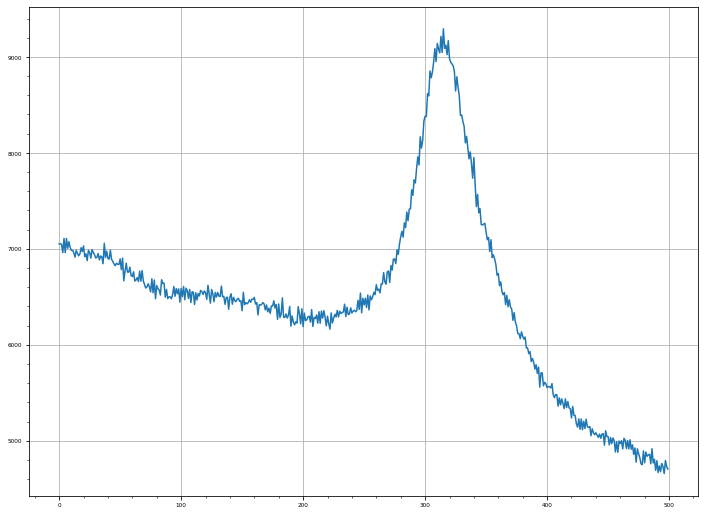

In [44]:
Index = list(range(1500,2000))
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['im'][regionx][regiony][Index])

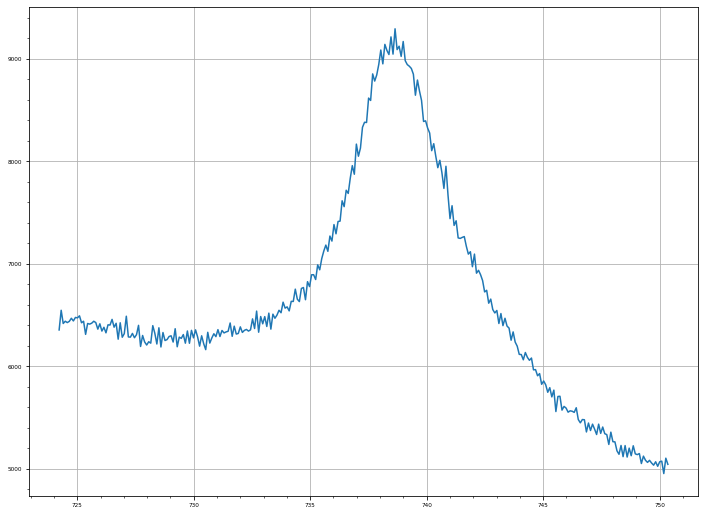

In [45]:
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['wavelength'][1650:1950],data['im'][regionx][regiony][1650:1950])

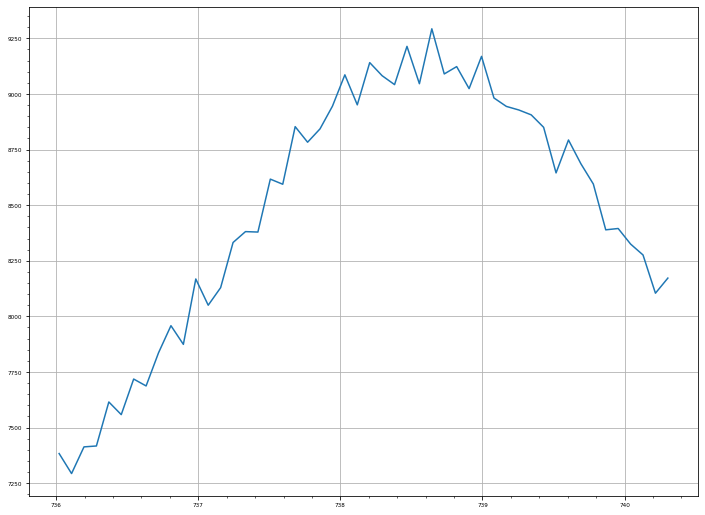

In [46]:
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['wavelength'][1785:1835],data['im'][regionx][regiony][1785:1835])

# Fit SiV-

In [47]:
currentPL = data['im'][regionx][regiony]
model2 = QuadraticModel(prefix='bkg_') + LorentzianModel(prefix='nvm_')
model = model2
params = model.make_params()
print('parameter names: {}'.format(model.param_names))

parameter names: ['bkg_a', 'bkg_b', 'bkg_c', 'nvm_amplitude', 'nvm_center', 'nvm_sigma']


In [48]:
params['nvm_center'].set(value=738.8, min = 737.8, max = 739.8, vary=True)
params['nvm_amplitude'].set(value=1000, vary=True)
params['nvm_sigma'].set(value=2, max = 5, vary=True)

params['bkg_a'].set(value = 0, vary=True)
params['bkg_b'].set(value = 0, min = 0, vary=True)
params['bkg_c'].set(value = 0, vary=True)


[[Model]]
    (Model(parabolic, prefix='bkg_') + Model(lorentzian, prefix='nvm_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 250
    # variables        = 6
    chi-square         = 322.620262
    reduced chi-square = 1.32221419
    Akaike info crit   = 75.7537633
    Bayesian info crit = 96.8825288
    R-squared          = 0.99999900
##  Warning: uncertainties could not be estimated:
    bkg_b:          at boundary
[[Variables]]
    bkg_a:         -0.03546828 (init = 0)
    bkg_b:          0.00000000 (init = 0)
    bkg_c:          24822.6193 (init = 0)
    nvm_amplitude:  32294.2260 (init = 1000)
    nvm_center:     738.886067 (init = 738.8)
    nvm_sigma:      2.85508895 (init = 2)
    nvm_fwhm:       5.71017790 == '2.0000000*nvm_sigma'
    nvm_height:     3600.43838 == '0.3183099*nvm_amplitude/max(1e-15, nvm_sigma)'


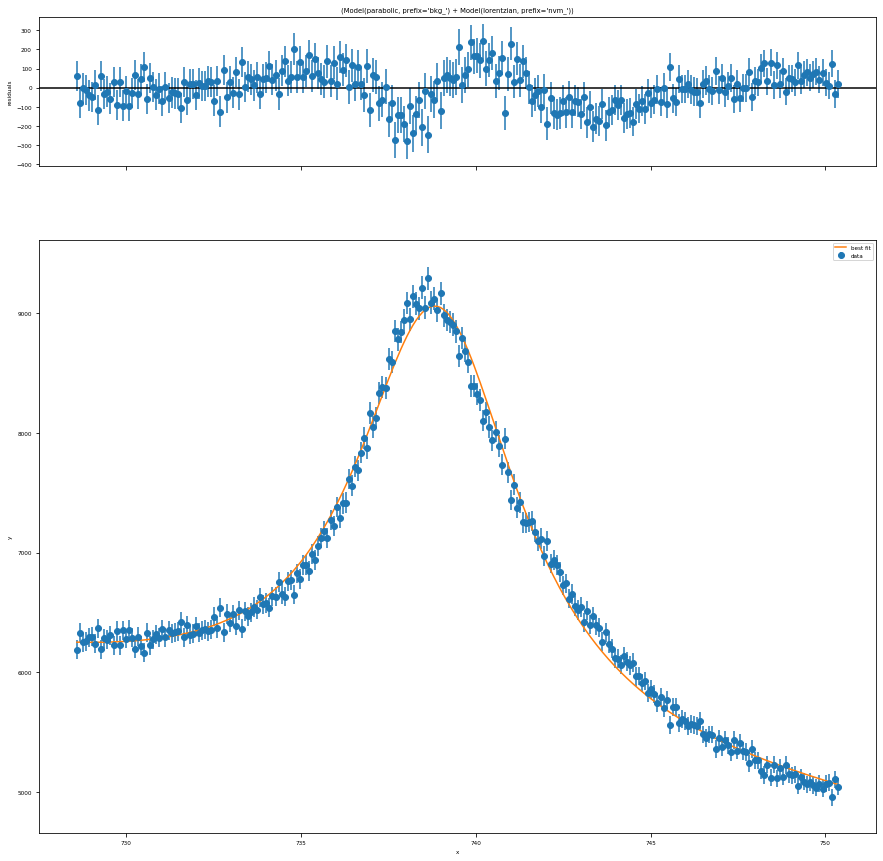

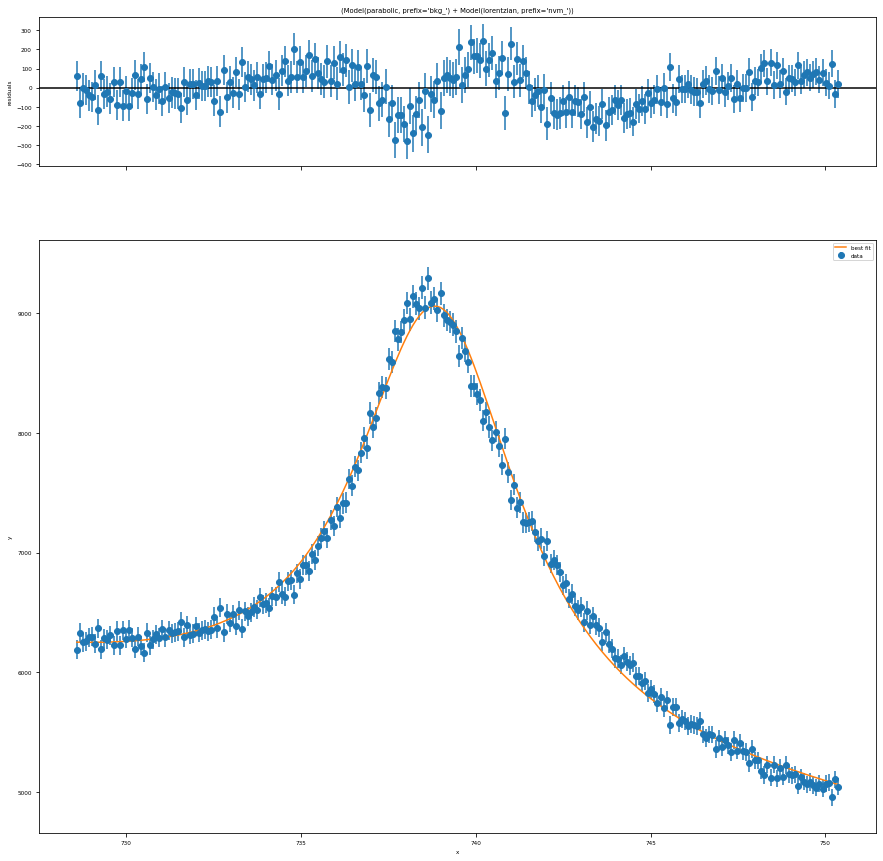

In [49]:
Index = list(range(1700,1950))

weightList = 1/np.sqrt(currentPL[Index])

result = model.fit(currentPL[Index], params, x=wavel[Index], weights=weightList)
print(result.fit_report(show_correl=False))
myfig=plt.figure(figsize=(15,15))
result.plot(fig=myfig)

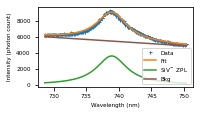

In [50]:
comps = result.eval_components(x=wavel[Index])
plt.rcParams.update({'font.size': 5.67})
cm = 1/2.54
fig = plt.figure(figsize=(7*cm, 4*cm))
plt.ylabel('Intensity (photon count)')
plt.xlabel('Wavelength (nm)')
plt.plot(wavel[Index], currentPL[Index], '+', markersize=3, label='Data')
plt.plot(wavel[Index], result.best_fit, label='Fit')
plt.plot(wavel[Index], comps['nvm_'], label='SiV$^-$ ZPL')
plt.plot(wavel[Index], comps['bkg_'], color = 'C5',label='Bkg')
plt.legend(loc = 'lower right')
plt.tight_layout()

fig.savefig('SiV ZPL fit.pdf', format= 'pdf',transparent=True)